In [ ]:
# dummty 124

value = 45
value

In [1]:
import pandas as pd

# Load the dataset
file_path = '~/Downloads/data_tshikama_xls.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Ensure columns are named correctly
df.columns = ['ciluba', 'french', 'score', 'sentiment', 'nature']

# Create translation and scoring dictionaries from the dataset
translation_lexique = dict(zip(df['french'].str.lower(), df['ciluba']))
lexique = dict(zip(df['ciluba'].str.lower(), df['score']))

def translate_text_using_lexicon(text, translation_lexique):
    words = text.lower().split()
    translated_words = [translation_lexique.get(word, word) for word in words]
    translated_text = ' '.join(translated_words)
    return translated_text

def analyse_sentiment(text):
    words = text.lower().split()
    word_scores = {word: lexique.get(word, 0) for word in words}
    score = sum(word_scores.values())
    if score > 0.05:
        sentiment = "Positif"
    elif score < -0.05:
        sentiment = "Négatif"
    else:
        sentiment = "Neutre"
    return score, sentiment, word_scores



# French text to translate
french_text = "Arrange Seulement"

# Translate the text using the lexicon
translated_text = translate_text_using_lexicon(french_text, translation_lexique)

# Analyse the sentiment of the translated text
total_score, sentiment, word_scores = analyse_sentiment(translated_text)

# Display results
print("Translated Text (Ciluba):", translated_text)
print("Total Score:", total_score)
print("Sentiment:", sentiment)
print("Word Scores:", word_scores)

Translated Text (Ciluba): Akaja Anu
Total Score: 5
Sentiment: Positif
Word Scores: {'akaja': 2, 'anu': 3}


In [54]:
df

,ciluba,french,score,sentiment,nature
0,Akaja,Arrange,1,Positif,Verbe
1,Akajilula,Rearrange,1,Positif,Verbe
2,Akula,Parle,2,Positif,Verbe
3,Akulula,Reparle,2,Positif,Verbe
4,Aluja,Remet,3,Positif,Verbe
...,...,...,...,...,...
2977,Kuhenda,Injurier,1,Positif,Verbe
2978,Kutata,Tamiser,8,Positif,Verbe
2979,Tangila,Regarde,3,Positif,Mot
2980,Lala,Dors,4,Positif,Mot


C:\Users\u21629545\AppData\Local\Temp\ipykernel_33604\774844198.py:21: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\u21629545\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


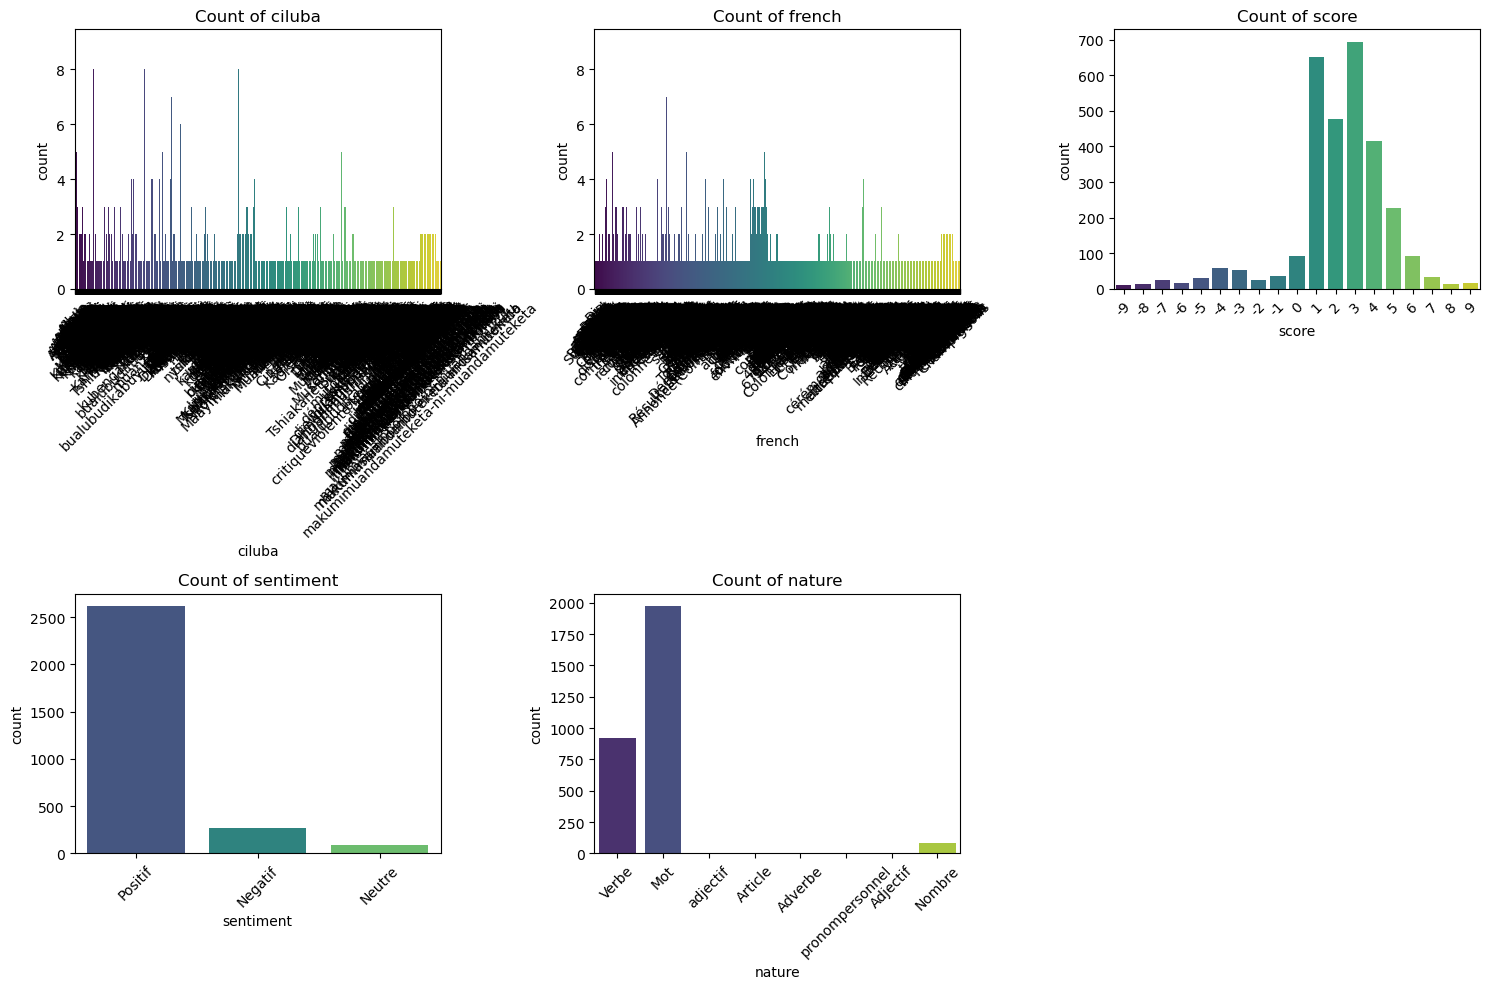

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '~/Downloads/data_tshikama_xls.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Ensure columns are named correctly
df.columns = ['ciluba', 'french', 'score', 'sentiment', 'nature']

# Plot the count of each unique value for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1300x1000 with 0 Axes>

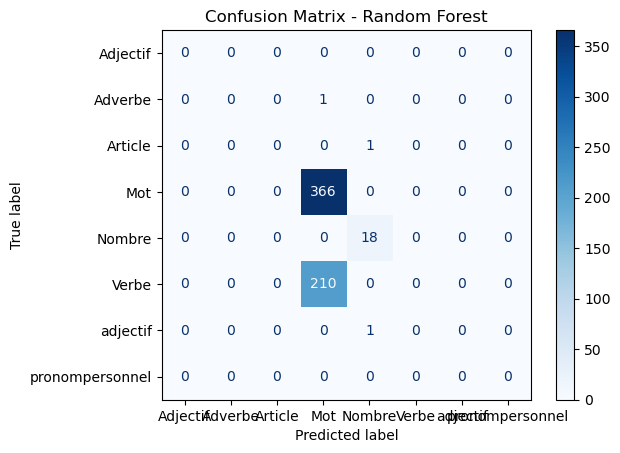

In [81]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = '~/Downloads/data_tshikama_xls.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Ensure columns are named correctly
df.columns = ['ciluba', 'french', 'score', 'sentiment', 'nature']

# Encode the 'sentiment' and 'nature' columns into numerical labels
label_encoder_sentiment = LabelEncoder()
df['sentiment_encoded'] = label_encoder_sentiment.fit_transform(df['sentiment'])
label_encoder_nature = LabelEncoder()
df['nature_encoded'] = label_encoder_nature.fit_transform(df['nature'])

# Prepare features (X) and target (y)
X = df[['score', 'sentiment_encoded']]
y = df['nature_encoded']

# Convert 'score' to numeric, if it’s not already
X['score'] = pd.to_numeric(X['score'], errors='coerce').fillna(0)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Decode the numerical labels for y_test and y_pred
y_test_decoded = label_encoder_nature.inverse_transform(y_test)
y_pred_decoded = label_encoder_nature.inverse_transform(y_pred)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder_nature.classes_)

# Plot confusion matrix
plt.figure(figsize=(13, 10))
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder_nature.classes_).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()











